In [1]:
# 管道和综合评估：
# 综合评估：一种统计估算程序，它结合了来自多个来源的数据，例如来自不同调查或数据库的数据，或来自同一纵向调查中不同时期的数据。
# 常见估算器：transformers,classifiers,regressors
# 管道：将多个估算器链接成一个。（处理数据时通常有固定的步骤序列：特征选择、标准化、分类等）

In [2]:
# 管道中除最后一个之外的所有估计器必须是变换器（即必须具有变换方法）。最后一个估计器可以是任何类型（变换器，分类器等）。

In [3]:
# 管道通过键值对列表创建: (键，值)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators=[('reduce_dim',PCA()), ('clf',SVC())]
pipe=Pipeline(estimators)
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [4]:
# 管道的估算器存储为steps属性中的列表：
pipe.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [5]:
# 以及以dict的形式存储在named_steps
pipe.named_steps['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# 可以使用<estimator> __ <parameter>语法访问管道中估计器的参数：
pipe.set_params(clf__C=10)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [7]:
# GridSearchCV的用法和作用？
# 它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果.
from sklearn.model_selection import GridSearchCV
param_grid=dict(reduce_dim_n_components=[2,5,10],clf__C=[0.1,10,100])
grid_search=GridSearchCV(pipe,param_grid=param_grid)

In [8]:
# example1: Pipeline Anona SVM 管道SVM方差分析/单因子变异数分析   (主要用来说明管道的使用方法和流程)
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
X,y = samples_generator.make_classification(n_samples=100,n_features=20,n_informative=3,n_redundant=0,
                                            n_classes=4,n_clusters_per_class=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

anova_filter = SelectKBest(f_regression,k=3)

clf=svm.SVC(kernel='linear')

anova_svm=make_pipeline(anova_filter,clf)
anova_svm.fit(X_train,y_train)
y_pred=anova_svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.50      0.29      0.36         7
           2       0.44      1.00      0.62         4
           3       1.00      0.38      0.55         8

   micro avg       0.52      0.52      0.52        25
   macro avg       0.60      0.58      0.51        25
weighted avg       0.64      0.52      0.50        25



In [10]:
# example2:Sample pipeline for text feature extraction and evaluation 用于文本特征提取和评估的示例管道
# 主要是GridSearchCV的用法
from __future__ import print_function
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [11]:
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')

categories=['alt.atheism','talk.religion.misc',]

print('Loading 20 newsgroups dataset for categories:')
print(categories)

data=fetch_20newsgroups(subset='train',categories=categories)
print('%d documents' % len(data.filenames))
print('%d categories' % len(data.target_names))

pipeline=Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',SGDClassifier()),
])

parameters={
    'vect__max_df':(0.5,0.75,1.0),
    'vect__ngram_range':((1,1),(1,2)),
    'clf__max_iter':(5,),
    'clf__alpha':(0.00001,0.000001),
    'clf__penalty':('l2','elasticnet'),
}

grid_search=GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1,verbose=1)
print('performing grid search...')
print('pipeline:',[name for name,_ in pipeline.steps])
print('parameters:')
pprint(parameters)
t0=time()
grid_search.fit(data.data,data.target)
print('done in %0.3fs' % (time() - t0))
print()

print('Best score:%0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name,best_parameters[param_name]))

2018-11-21 21:18:19,651 INFO Downloading 20news dataset. This may take a few minutes.
2018-11-21 21:18:19,652 INFO Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories
performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (5,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   19.4s finished


done in 20.117s

Best score:0.953
Best parameters set:
	clf__alpha: 1e-06
	clf__max_iter: 5
	clf__penalty: 'elasticnet'
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


In [12]:
# example3:Pipelining: chaining a PCA and a logistic regression 流水线：链接PCA和逻辑回归
# PCA进行无监督降维，而逻辑回归进行预测.使用GridSearchCV来设置PCA的维度
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Best parameter (CV score=0.919):
{'logistic__alpha': 0.01, 'pca__n_components': 40}


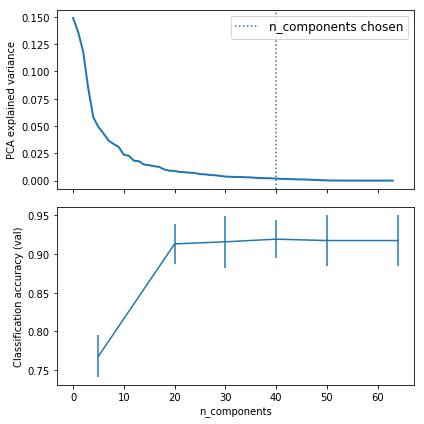

In [13]:
logistic = SGDClassifier(loss='log',penalty='l2',early_stopping=True,max_iter=10000,tol=1e-5,random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca',pca),('logistic',logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

param_grid = {
    'pca__n_components':[5,20,30,40,50,64],
    'logistic__alpha':np.logspace(-4,4,5),
}
search = GridSearchCV(pipe,param_grid,iid=False,cv=5,return_train_score=False)
search.fit(X_digits,y_digits)
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

pca.fit(X_digits)

fig,(ax0,ax1) = plt.subplots(nrows=2,sharex=True,figsize=(6,6))
ax0.plot(pca.explained_variance_ratio_,linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
           linestyle=':',label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
        lambda g: g.nlargest(1,'mean_test_score'))

best_clfs.plot(x=components_col,y='mean_test_score',yerr='std_test_score',legend=False,ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()